In [78]:
import pandas as pd
import matplotlib.pyplot as plt
import random
import networkx as nx
import os
import re
from w3lib.html import replace_entities

import torch
import numpy as np
from sklearn.preprocessing import LabelEncoder
from transformers import BertTokenizer

In [79]:
df = pd.read_csv("../data/raw/Book-Crossing User review ratings.csv")

In [80]:
df.head(4)

,Unnamed: 0,user_id,location,age,isbn,rating,book_title,book_author,year_of_publication,publisher,img_s,img_m,img_l,Summary,Language,Category,city,state,country
0,0,2,"stockton, california, usa",18.0000,0195153448,0,Classical Mythology,Mark P. O. Morford,2002.0,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,Provides an introduction to classical myths pl...,en,['Social Science'],stockton,california,usa
1,1,8,"timmins, ontario, canada",34.7439,0002005018,5,Clara Callan,Richard Bruce Wright,2001.0,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,"In a small town in Canada, Clara Callan reluct...",en,['Actresses'],timmins,ontario,canada
2,2,11400,"ottawa, ontario, canada",49.0000,0002005018,0,Clara Callan,Richard Bruce Wright,2001.0,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,"In a small town in Canada, Clara Callan reluct...",en,['Actresses'],ottawa,ontario,canada
3,3,11676,"n/a, n/a, n/a",34.7439,0002005018,8,Clara Callan,Richard Bruce Wright,2001.0,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,"In a small town in Canada, Clara Callan reluct...",en,['Actresses'],NaN,NaN,NaN


In [81]:
unnecessary_col = ["Unnamed: 0", "location"]

In [82]:
df["Category"] = df["Category"].apply(lambda x : re.sub(r"[\"\[w+\]\']", "", x))
df["Summary"] = df["Summary"].apply(lambda x : replace_entities(x))
df["Summary"] = df["Summary"].apply(lambda x : re.sub(r"[^a-zA-Z0-9\\\s]", "", x))

In [83]:
df = df.drop(unnecessary_col, axis=1)

In [84]:
df = df.drop_duplicates(keep='first')

In [85]:
df.drop(df[df['Language'] == "9"].index, inplace = True)
df.drop(df[df['Category'] == "9"].index, inplace = True)
df.drop(df[df['Summary'] == "9"].index, inplace = True)

In [86]:
df.head(4)

,user_id,age,isbn,rating,book_title,book_author,year_of_publication,publisher,img_s,img_m,img_l,Summary,Language,Category,city,state,country
0,2,18.0000,0195153448,0,Classical Mythology,Mark P. O. Morford,2002.0,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,Provides an introduction to classical myths pl...,en,Social Science,stockton,california,usa
1,8,34.7439,0002005018,5,Clara Callan,Richard Bruce Wright,2001.0,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,In a small town in Canada Clara Callan relucta...,en,Actresses,timmins,ontario,canada
2,11400,49.0000,0002005018,0,Clara Callan,Richard Bruce Wright,2001.0,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,In a small town in Canada Clara Callan relucta...,en,Actresses,ottawa,ontario,canada
3,11676,34.7439,0002005018,8,Clara Callan,Richard Bruce Wright,2001.0,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,In a small town in Canada Clara Callan relucta...,en,Actresses,NaN,NaN,NaN


<Axes: xlabel='Language'>

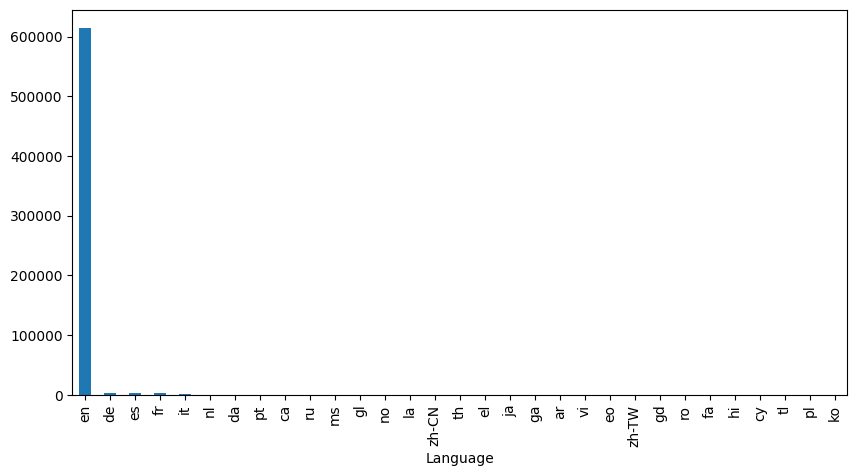

In [87]:
plt.figure(figsize=(10, 5))
df["Language"].value_counts().plot.bar()

In [88]:
# df = df.sample(n=15_000)

In [89]:
print(f"The most frequently user id: {df['user_id'].mode()[0]}")
print(f"The most frequently book: {df['book_title'].mode()[0]}")

The most frequently user id: 11676
The most frequently book: Wild Animus


In [90]:
missing_col = ["book_author", "city", "state", "country"]

for col in df.columns:
  if df[col].dtype != float:
    df[col] = df[col].fillna(df[col].mode()[0])

In [91]:
df.isna().sum()

user_id                0
age                    0
isbn                   0
rating                 0
book_title             0
book_author            0
year_of_publication    0
publisher              0
img_s                  0
img_m                  0
img_l                  0
Summary                0
Language               0
Category               0
city                   0
state                  0
country                0
dtype: int64

In [92]:
df = df.replace(
    "Alice (Fictitious character",
    "Alice (Fictitious character : Carroll)",
)

In [93]:
number_of_samples = len(df)
print(f"Number of samples: {number_of_samples:,}")

Number of samples: 625,073


In [94]:
number_of_users = len(df["user_id"].unique())
print(f"Number of users: {number_of_users:,}")

Number of users: 67,699


In [95]:
number_of_books = len(df["isbn"].unique())
print(f"Number of books: {number_of_books:,}")

Number of books: 138,701


In [96]:
df = df.sort_values("user_id")

In [97]:
encode_cols = [
    "book_title",
    "book_author",
    "publisher",
    "Language",
    "Category",
    "isbn",
    "city",
    "state",
    "country",
]

for col in encode_cols:
    df.loc[:, col] = LabelEncoder().fit_transform(df[col])

## Split data to 2 parts (User, Book)

In [98]:
user_features_col = [
    "user_id",
    "age",
    "rating",
    "city",
    "state",
    "country",
]
users_df = df[user_features_col].reset_index()

In [99]:
books_features_col = [
    "isbn",
    "book_title",
    "book_author",
    "year_of_publication",
    "publisher",
    "Summary",
    "Language",
    "Category",
]

books_df = df[books_features_col].reset_index()

In [100]:
rating = df[["user_id", "isbn", "rating"]]

In [101]:
number_of_nodes = len(users_df["user_id"].unique()) + len(books_df["isbn"].unique())
print(f"{number_of_nodes = :,}")

number_of_nodes = 206,400


In [103]:
books_images = {}

for record in books_df.to_numpy():
    isbn = record[0]
    image_link = df.iloc[:, 8]
    if isbn not in books_images.keys():
        books_images[isbn] = image_link

In [105]:
books_df.head(1)

,index,isbn,book_title,book_author,year_of_publication,publisher,Summary,Language,Category
0,0,13884,19743,38803,2002.0,5507,Provides an introduction to classical myths pl...,6,6006


In [106]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

In [107]:
edge_index = rating[["user_id", "isbn"]].values.transpose()
labels = rating["rating"].values

In [108]:
G = nx.Graph()
for u, v in zip(*edge_index):
    G.add_edge(u, v)

In [109]:
users_frequency = df["user_id"].value_counts().to_list()
books_frequency = df["isbn"].value_counts().to_list()
node_colors = [f'#{random.randint(0, 0xFFFFFF):06x}' for _ in range(number_of_nodes)]

In [110]:
degrees = dict(G.degree)
node_size = [v * 10 for v in degrees.values()]

In [111]:
if not os.path.exists("../docs/book_review_1.png"):
    plt.figure(figsize=(30, 20))
    nx.draw(G=G, node_color=node_colors, node_size=node_size)
    plt.savefig("../docs/book_review_1.png", dpi=300, bbox_inches='tight')

In [112]:
summary_sentences = books_df["Summary"].to_list()

In [113]:
MAX_LENGTH = 34
PRE_TRAINED_PATH = "bert-base-uncased"
tokenizer = BertTokenizer.from_pretrained(PRE_TRAINED_PATH)

In [114]:
encoding = tokenizer(
    summary_sentences,
    add_special_tokens=False,
    max_length=MAX_LENGTH,
    padding=True,
    return_attention_mask=False,
    return_tensors="pt",
)

d:\Experiments\BookRecommendationSystem\venv\lib\site-packages\transformers\tokenization_utils_base.py:2436: UserWarning: `max_length` is ignored when `padding`=`True` and there is no truncation strategy. To pad to max length, use `padding='max_length'`.
  warnings.warn(


In [115]:
embedding_matrix = encoding["input_ids"]

In [116]:
instance_view = embedding_matrix.transpose(0, 1)

In [117]:
embeddings = {f"Summary_{i}": [] for i in range(1, MAX_LENGTH + 1)}
for i, key in enumerate(embeddings.keys()):
    embeddings[key] = instance_view[i].tolist()

In [118]:
summary_df = pd.DataFrame(embeddings)

In [119]:
len(books_df)

625073

In [120]:
len(summary_df)

625073

In [121]:
books_df = pd.concat([books_df, summary_df], axis=1)

In [122]:
books_df.drop(["Summary"], inplace=True, axis=1)

In [123]:
books_df

,index,isbn,book_title,book_author,year_of_publication,publisher,Language,Category,Summary_1,Summary_2,...,Summary_25,Summary_26,Summary_27,Summary_28,Summary_29,Summary_30,Summary_31,Summary_32,Summary_33,Summary_34
0,0,13884,19743,38803,2002.0,5507,6,6006,3640,2019,...,2129,2122,6991,2031,2042,6791,1999,3906,2396,0
1,63,45375,123791,49567,2000.0,917,6,4108,8927,2011,...,2357,2041,11543,2107,2004,2065,1996,4633,2006,20315
2,71,78295,120328,11973,1996.0,6239,6,3535,2019,23949,...,8350,1998,2037,3268,2008,25416,10421,2015,2116,1997
3,18,32529,35371,20407,1999.0,2621,6,4840,5577,1996,...,2740,4584,2000,3305,1998,4652,2178,12765,6090,3207
4,72,86494,124699,2592,2002.0,6743,6,3535,2085,2067,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
625068,329392,59061,94507,35209,1990.0,4033,6,3535,4487,28745,...,1996,18268,3786,2043,2002,1998,12849,3683,1996,25583
625069,807433,64230,47483,49304,1988.0,747,6,3535,2005,2086,...,1996,25180,2015,2007,11620,11530,13240,11749,3459,1997
625070,237537,44975,44477,44954,1998.0,917,6,3535,1996,24842,...,0,0,0,0,0,0,0,0,0,0
625071,177877,66605,9288,56163,2000.0,744,6,3535,1999,1996,...,3727,2498,2369,2021,11289,5685,1996,3256,25778,2094


In [124]:
users_df.head()

,index,user_id,age,rating,city,state,country
0,0,2,18.0000,0,10074,249,311
1,63,8,34.7439,0,10480,1074,47
2,71,8,34.7439,0,10480,1074,47
3,18,8,34.7439,0,10480,1074,47
4,72,8,34.7439,5,10480,1074,47


In [125]:
preprocessed_data = pd.concat([users_df, books_df], axis=1)

In [126]:
preprocessed_data.drop(["index"], axis=1, inplace=True)

In [127]:
preprocessed_data

,user_id,age,rating,city,state,country,isbn,book_title,book_author,year_of_publication,...,Summary_25,Summary_26,Summary_27,Summary_28,Summary_29,Summary_30,Summary_31,Summary_32,Summary_33,Summary_34
0,2,18.0000,0,10074,249,311,13884,19743,38803,2002.0,...,2129,2122,6991,2031,2042,6791,1999,3906,2396,0
1,8,34.7439,0,10480,1074,47,45375,123791,49567,2000.0,...,2357,2041,11543,2107,2004,2065,1996,4633,2006,20315
2,8,34.7439,0,10480,1074,47,78295,120328,11973,1996.0,...,8350,1998,2037,3268,2008,25416,10421,2015,2116,1997
3,8,34.7439,0,10480,1074,47,32529,35371,20407,1999.0,...,2740,4584,2000,3305,1998,4652,2178,12765,6090,3207
4,8,34.7439,5,10480,1074,47,86494,124699,2592,2002.0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
625068,278854,34.7439,0,8311,1080,311,59061,94507,35209,1990.0,...,1996,18268,3786,2043,2002,1998,12849,3683,1996,25583
625069,278854,34.7439,6,8311,1080,311,64230,47483,49304,1988.0,...,1996,25180,2015,2007,11620,11530,13240,11749,3459,1997
625070,278854,34.7439,7,8311,1080,311,44975,44477,44954,1998.0,...,0,0,0,0,0,0,0,0,0,0
625071,278854,34.7439,8,8311,1080,311,66605,9288,56163,2000.0,...,3727,2498,2369,2021,11289,5685,1996,3256,25778,2094


In [129]:
preprocessed_data.to_csv("../data/processed/BookReviewProcessedData.csv", index=False)